# Navies Bayes

__Pclass as DV and the rest are IDV__

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("nvtrain.csv")

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
from sklearn import preprocessing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
le = preprocessing.LabelEncoder()

In [12]:
le.fit(dataset["Sex"])

LabelEncoder()

In [13]:
dataset["Sex"] = le.transform(dataset["Sex"])

In [14]:
le.fit(dataset["Pclass"])
le.fit(dataset["SibSp"])

LabelEncoder()

In [15]:
dataset["Age"].mean()

29.69911764705882

In [16]:
import numpy as np

In [17]:
new_age_var = np.where(dataset["Age"].isnull(),29,dataset["Age"])

In [18]:
dataset["Age"] = new_age_var

In [19]:
dataset= pd.get_dummies(data = dataset, dummy_na=True, prefix= ["Embarked"],columns=["Embarked"])

In [20]:
y = dataset["Pclass"]

In [21]:
X = dataset.drop(["Ticket","Pclass","PassengerId","Name","Cabin","Embarked_nan"],axis = 1)

In [22]:
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,0,0,1,0


In [23]:
y.count()

891

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [25]:
X_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
857,1,1,51.0,0,0,26.5500,0,0,1
52,1,0,49.0,1,0,76.7292,1,0,0
386,0,1,1.0,5,2,46.9000,0,0,1
124,0,1,54.0,0,1,77.2875,0,0,1
578,0,0,29.0,1,0,14.4583,1,0,0


In [26]:
from sklearn.naive_bayes import *

In [27]:
clf = BernoulliNB()

In [28]:
X.isnull().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [29]:
X.head(1)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.25,0,0,1


In [30]:
# Based on training dataset we are classifying the test dataset..
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [31]:
confusion = confusion_matrix(y_test,y_pred)

In [32]:
confusion

array([[ 25,  12,  23],
       [  4,  21,  27],
       [ 16,  18, 122]], dtype=int64)

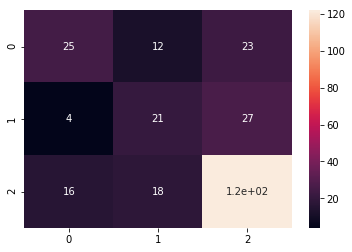

In [33]:
import seaborn as sns
sns.heatmap(confusion, annot=True)

In [34]:
accuracy_score(y_test,y_pred)

0.6268656716417911

__Sex as DV and the rest as IDV__

In [35]:
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,0,0,1,0


In [36]:
y = dataset["Sex"]

In [37]:
x = dataset.drop(["Ticket","Sex","PassengerId","Name","Cabin","Embarked_nan"],axis = 1)

In [38]:
x.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [40]:
X_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
857,1,1,51.0,0,0,26.5500,0,0,1
52,1,0,49.0,1,0,76.7292,1,0,0
386,0,1,1.0,5,2,46.9000,0,0,1
124,0,1,54.0,0,1,77.2875,0,0,1
578,0,0,29.0,1,0,14.4583,1,0,0


In [41]:
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [42]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[ 99,   0],
       [  0, 169]], dtype=int64)

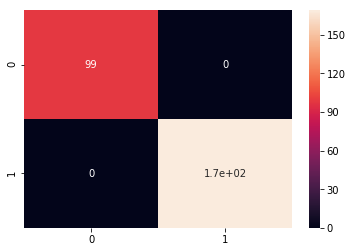

In [43]:
sns.heatmap(confusion, annot=True)

In [44]:
accuracy_score(y_test,y_pred)

1.0

__Parch as DV and the rest as IDV__

In [45]:
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,0,0,1,0


In [46]:
y = dataset["Parch"]

In [47]:
X = dataset.drop(["Ticket","Parch","PassengerId","Name","Cabin","Embarked_nan"],axis = 1)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [49]:
X_train.shape

(623, 9)

In [50]:
# Based on training dataset we are classifying the test dataset..
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [51]:
confusion = confusion_matrix(y_pred,y_test)

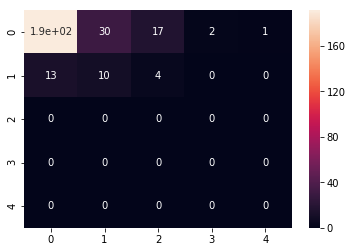

In [52]:
sns.heatmap(confusion, annot = True)

In [53]:
accuracy_score(y_test,y_pred)

0.75

__sibsp as DV and rest as IDV__

In [54]:
y = dataset["SibSp"]

In [55]:
X = dataset.drop(["Ticket","SibSp","PassengerId","Name","Cabin","Embarked_nan"],axis = 1)

In [56]:
X.head(1)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,0,7.25,0,0,1


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [58]:
X_train.head(1)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
857,1,1,1,51.0,0,26.55,0,0,1


In [59]:
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [60]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[162,  19,   0,   0,   0,   0],
       [ 45,  20,   0,   0,   0,   0],
       [  4,   3,   0,   0,   0,   0],
       [  4,   2,   0,   0,   0,   0],
       [  4,   3,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0]], dtype=int64)

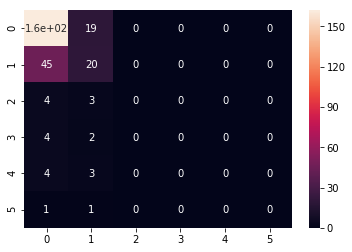

In [61]:
sns.heatmap(cf, annot = True)

In [62]:
accuracy_score(y_test,y_pred)

0.6791044776119403

__Embarked as Dv and the rest as IDV__

In [63]:
dataset = pd.read_csv("nvtrain.csv")

In [64]:
freq_port = dataset.Embarked.dropna().mode()[0]
freq_port

'S'

In [65]:
combine = [dataset]

In [66]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [67]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [75]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

In [76]:
dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,0


In [77]:
y = dataset["Embarked"]

In [78]:
X = dataset.drop(["Ticket","Embarked","PassengerId","Name","Cabin"],axis = 1)

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state=0)

In [80]:
new_age_var = np.where(dataset["Age"].isnull(),29,dataset["Age"])
dataset["Age"] = new_age_var

In [81]:
y_pred = clf.fit(X_train,y_train).predict(X_test)

In [82]:
confusion = confusion_matrix(y_test,y_pred)

In [83]:
confusion

array([[187,   0,   0],
       [ 60,   0,   0],
       [ 21,   0,   0]], dtype=int64)

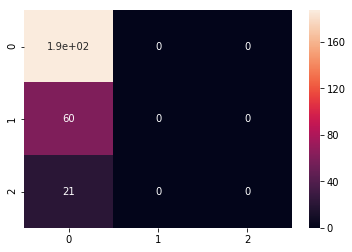

In [86]:
sns.heatmap(confusion, annot = True)

In [87]:
accuracy_score(y_test,y_pred)

0.6977611940298507